
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
X = np.random.randn(100, 3)
true_w = np.array([2.0, -1.5, 0.5])
y = X @ true_w + 3 + np.random.randn(100) * 0.5


In [ ]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1.0
        return self

    def transform(self, X):
        return (X - self.mean_) / self.std_


    def fit_transform(self, X):
        return self.fit(X).transform(X)



In [ ]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda


    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            y_hat = X @ self.w + self.b
            err = y_hat - y

            loss = np.mean(err**2) + self.l2_lambda * np.sum(self.w**2)
            self.losses.append(loss)

            dw = (2/n) * (X.T @ err) + 2 * self.l2_lambda * self.w
            db = (2/n) * np.sum(err)

            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict(self, X):
        return X @ self.w + self.b


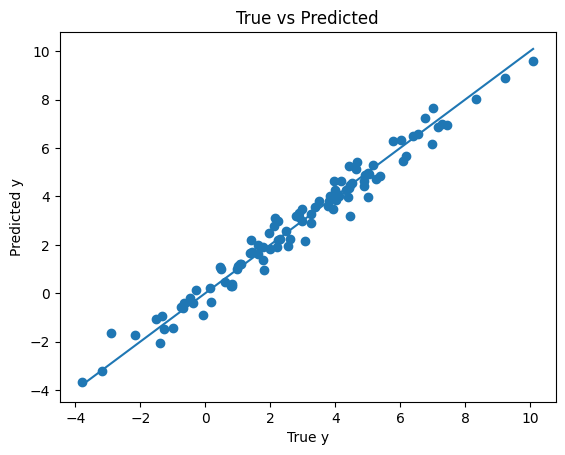

In [ ]:
best_model = LinearRegressionManual(lr=0.05, epochs=500, l2_lambda=0.01)
best_model.fit(X_scaled, y)
y_pred = best_model.predict(X_scaled)

plt.figure()
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("True vs Predicted")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            # Forward pass
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            # Binary Cross-Entropy loss + L2 regularization
            eps = 1e-9
            loss = (
                -np.mean(
                    y * np.log(y_hat + eps) +
                    (1 - y) * np.log(1 - y_hat + eps)
                )
                + self.l2_lambda * np.sum(self.w ** 2)
            )
            self.losses.append(loss)

            # Gradients
            error = y_hat - y
            dw = (1 / n) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (1 / n) * np.sum(error)

            # Gradient Descent update
            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)



In [ ]:
# Ensure binary labels are 0 and 1
y = (y > 0).astype(int)


In [ ]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [ ]:
model = LogisticRegressionManual(
    lr=0.01,
    epochs=3000,
    l2_lambda=0.001
)



model.fit(X_scaled, y)


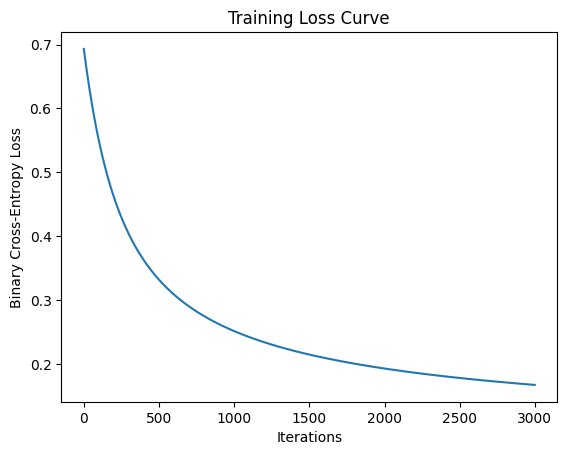

In [ ]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve")
plt.show()


In [ ]:
print("Predicted probabilities (first 10):")
print(model.predict_proba(X_scaled)[:10])

print("Predicted labels (first 10):")
print(model.predict(X_scaled)[:10])

print("True labels (first 10):")
print(y[:10])


Predicted probabilities (first 10):
[0.99462973 0.95827119 0.9830621  0.97639317 0.97678737 0.74864251
 0.93188478 0.88554005 0.99955488 0.75990376]
Predicted labels (first 10):
[1 1 1 1 1 1 1 1 1 1]
True labels (first 10):
[1 1 1 1 1 1 1 1 1 1]


In [ ]:
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)
print("Final Accuracy:", accuracy)


Final Accuracy: 0.98



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):

    n, m = M.shape

    # Flatten matrix elements into a vector
    values = M.flatten()

    # Initialize centroids randomly from values
    centroids = np.random.choice(values, size=k, replace=False)

    # Assignment array for flattened values
    labels = np.zeros_like(values, dtype=int)

    for _ in range(max_iters):
        # Assignment step
        for idx, val in enumerate(values):
            distances = np.abs(val - centroids)
            labels[idx] = np.argmin(distances)

        # Update step
        new_centroids = np.zeros(k)
        for c in range(k):
            cluster_vals = values[labels == c]
            if len(cluster_vals) > 0:
                new_centroids[c] = np.mean(cluster_vals)
            else:
                new_centroids[c] = centroids[c]  # keep old if empty

        # Convergence check
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    # Reshape assignments back to matrix shape
    assignment_table = labels.reshape(n, m)

    # Build cookbook
    cookbook = {c: [] for c in range(k)}
    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids


In [ ]:
np.random.seed(42)
M = np.random.rand(5, 6)
k = 3


In [ ]:
assignment_table, cookbook, centroids = kmeans_matrix(M, k)


In [ ]:
print("Original Matrix:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)


Original Matrix:
 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]]

Assignment Table:
 [[1 0 0 0 2 2]
 [2 0 0 0 2 0]
 [0 2 2 2 1 1]
 [1 1 0 2 1 1]
 [1 0 2 1 0 2]]

Centroids:
 [0.74986604 0.39505821 0.13538679]


In [ ]:
for cluster_id, positions in cookbook.items():
    print(f"\nCluster {cluster_id}:")
    print("Positions:", positions)



Cluster 0:
Positions: [(0, 1), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3), (1, 5), (2, 0), (3, 2), (4, 1), (4, 4)]

Cluster 1:
Positions: [(0, 0), (2, 4), (2, 5), (3, 0), (3, 1), (3, 4), (3, 5), (4, 0), (4, 3)]

Cluster 2:
Positions: [(0, 4), (0, 5), (1, 0), (1, 4), (2, 1), (2, 2), (2, 3), (3, 3), (4, 2), (4, 5)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
